<a href="https://colab.research.google.com/github/Mz72100/Machine-learning-toturial/blob/main/EDA_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fraudulent Transaction Detection in Financial Systems.**

# **Part 1: Loading Library Files and Dataset**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# Load the datasets
train_identity = pd.read_csv('train_identity.csv')
test_identity = pd.read_csv('test_identity.csv')

# Fix column naming inconsistency between Train and Test
test_identity.columns = [col.replace('-', '_') if 'id' in col else col for col in test_identity.columns]

print(f"Train Identity Shape: {train_identity.shape}")
print(f"Test Identity Shape: {test_identity.shape}")


Train Identity Shape: (144233, 41)
Test Identity Shape: (141907, 41)


# **Part 2: Exploratory Data Analysis**

## **Data Overview**

In [5]:
# Display the first 5 rows
train_identity.head()

# Check data types and non-null counts
train_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49502 entries, 0 to 49501
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionID  49502 non-null  int64  
 1   id_01          49502 non-null  float64
 2   id_02          48182 non-null  float64
 3   id_03          21653 non-null  float64
 4   id_04          21653 non-null  float64
 5   id_05          46738 non-null  float64
 6   id_06          46738 non-null  float64
 7   id_07          1898 non-null   float64
 8   id_08          1898 non-null   float64
 9   id_09          25260 non-null  float64
 10  id_10          25260 non-null  float64
 11  id_11          48293 non-null  float64
 12  id_12          49502 non-null  object 
 13  id_13          40655 non-null  float64
 14  id_14          37024 non-null  float64
 15  id_15          48293 non-null  object 
 16  id_16          45707 non-null  object 
 17  id_17          47756 non-null  float64
 18  id_18 

## **Missing Value Analysis**

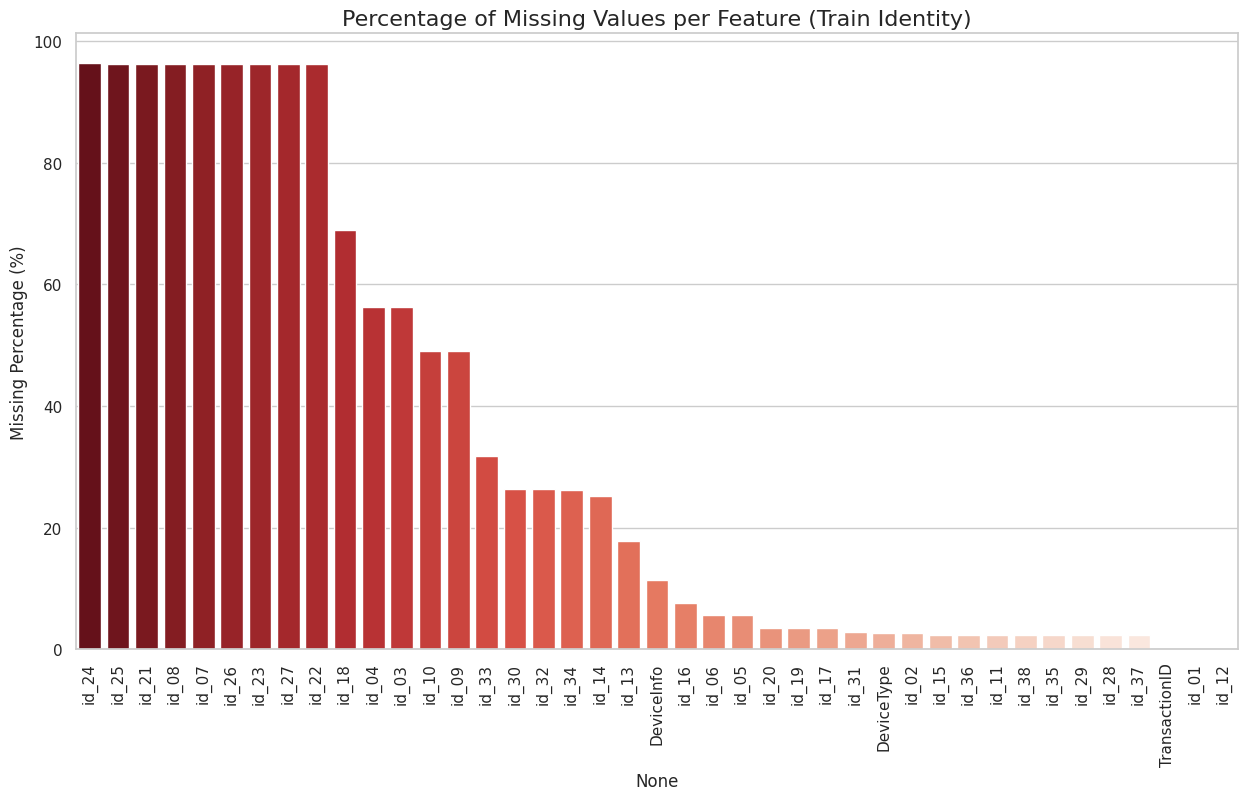

Columns with >80% missing values: ['id_24', 'id_25', 'id_21', 'id_08', 'id_07', 'id_26', 'id_23', 'id_27', 'id_22']


In [6]:
# Calculate percentage of missing values
missing_values = train_identity.isnull().sum().sort_values(ascending=False) / len(train_identity) * 100

# Plot the missing values
plt.figure(figsize=(15, 8))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='Reds_r')
plt.title('Percentage of Missing Values per Feature (Train Identity)', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Missing Percentage (%)')
plt.show()

# Identifying columns with more than 80% missing data
cols_to_drop = missing_values[missing_values > 80].index.tolist()
print(f"Columns with >80% missing values: {cols_to_drop}")

## **Categorical Feature Exploration**

### **Device Type Distribution**

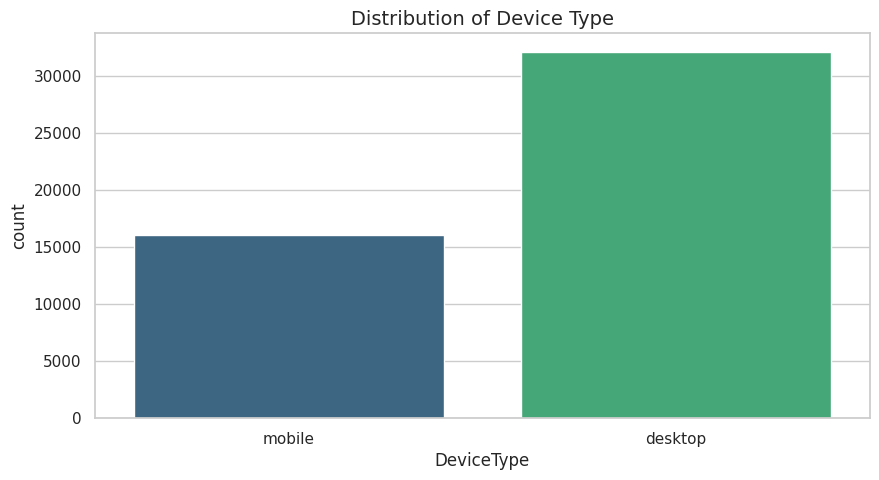

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train_identity, x='DeviceType', palette='viridis')
plt.title('Distribution of Device Type', fontsize=14)
plt.show()

### **Top 10 Browsers and Operating Systems**

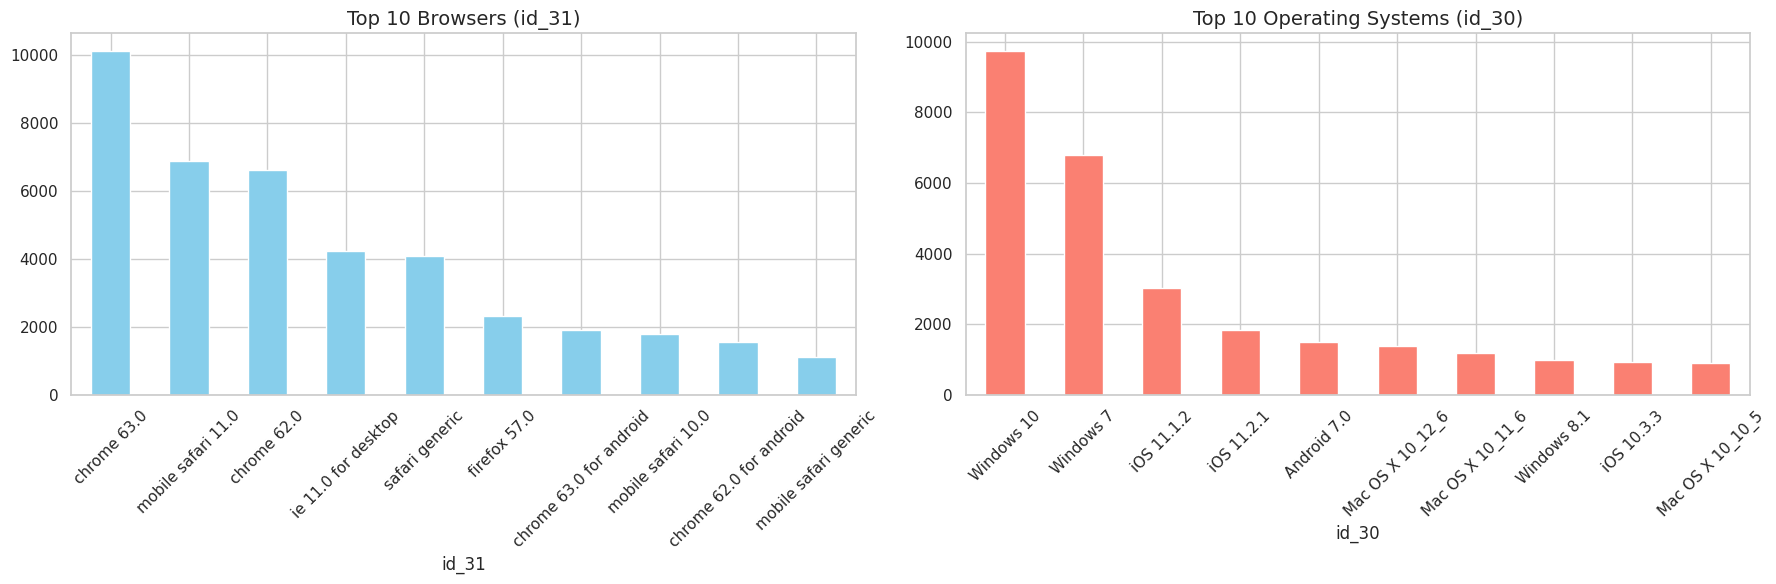

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Top 10 Browsers (id_31)
train_identity['id_31'].value_counts().head(10).plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Top 10 Browsers (id_31)', fontsize=14)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

# Top 10 Operating Systems (id_30)
train_identity['id_30'].value_counts().head(10).plot(kind='bar', ax=ax[1], color='salmon')
ax[1].set_title('Top 10 Operating Systems (id_30)', fontsize=14)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

## **Numerical Feature Distribution**

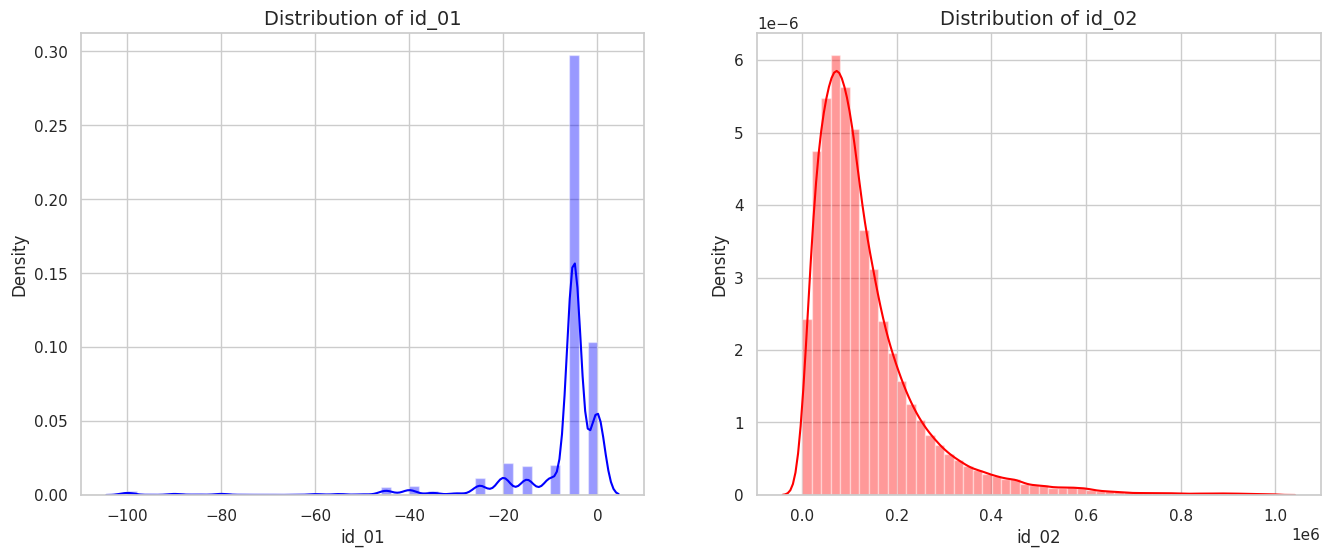

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# id_01: Often a numerical indicator of risk or distance
sns.distplot(train_identity['id_01'].dropna(), ax=axes[0], color='blue')
axes[0].set_title('Distribution of id_01', fontsize=14)

# id_02: Raw numerical score or ID
sns.distplot(train_identity['id_02'].dropna(), ax=axes[1], color='red')
axes[1].set_title('Distribution of id_02', fontsize=14)

plt.show()

## **Cardinality of Features**

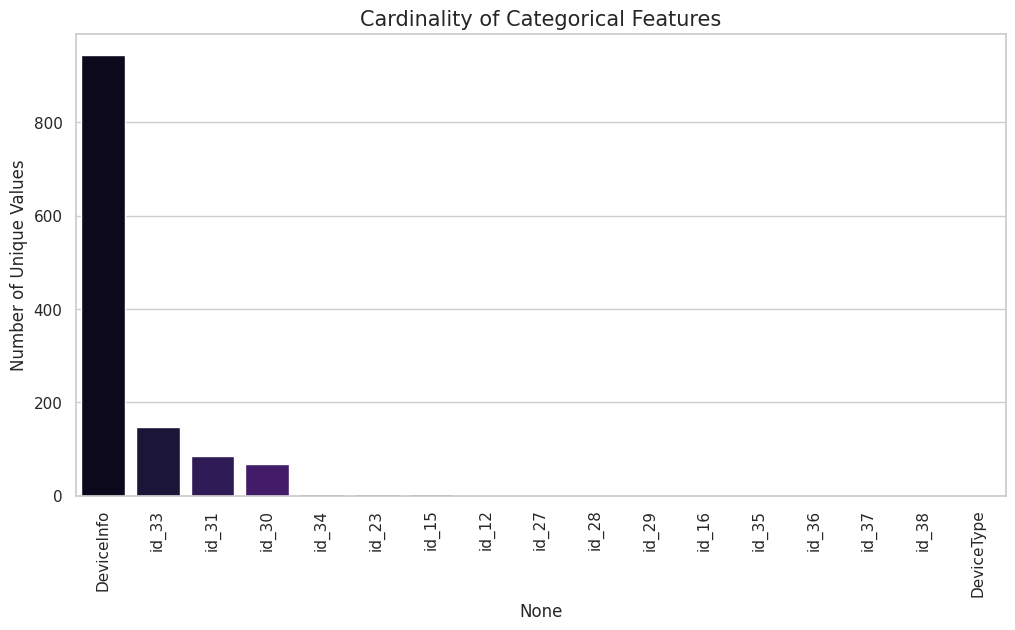

In [10]:
# Check cardinality of object columns
cat_cols = train_identity.select_dtypes(include=['object']).columns
cardinality = train_identity[cat_cols].nunique().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=cardinality.index, y=cardinality.values, palette='magma')
plt.title('Cardinality of Categorical Features', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Number of Unique Values')
plt.show()

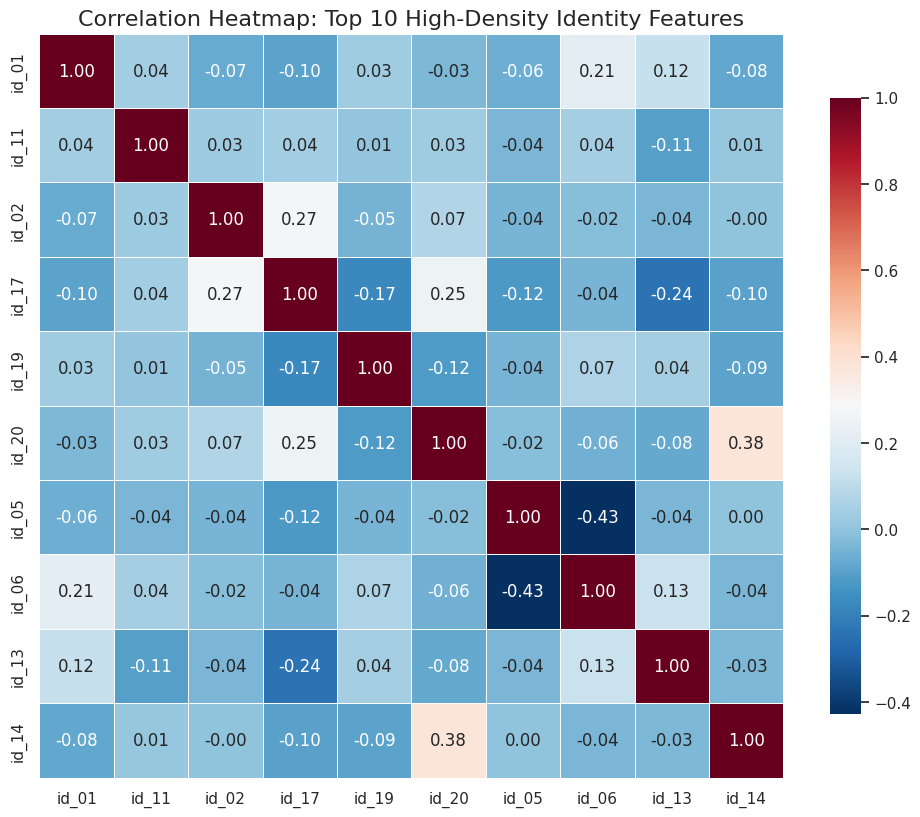

Features analyzed: ['id_01', 'id_11', 'id_02', 'id_17', 'id_19', 'id_20', 'id_05', 'id_06', 'id_13', 'id_14']


In [11]:
# 1. Select numerical columns (excluding TransactionID)
numerical_cols = train_identity.select_dtypes(include=[np.number]).columns.tolist()
if 'TransactionID' in numerical_cols:
    numerical_cols.remove('TransactionID')

# 2. Identify top 10 features with the highest number of non-null entries
top_10_features = train_identity[numerical_cols].count().sort_values(ascending=False).head(10).index.tolist()

# 3. Compute the correlation matrix
corr_matrix = train_identity[top_10_features].corr()

# 4. Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='RdBu_r',
            fmt=".2f",
            linewidths=0.5,
            square=True,
            cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap: Top 10 High-Density Identity Features', fontsize=16)
plt.show()

print(f"Features analyzed: {top_10_features}")